In [95]:
#analytics
import pandas as pd
import glob
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from entropy import *


# visuals
import matplotlib.pyplot as plt

## Import Condition Data

In [96]:
#condition = [pd.read_csv(f,header=0, index_col=0, parse_dates=True, squeeze=True) for f in glob.glob("data/Condition/*.txt")]

condition = [np.loadtxt(f) for f in glob.glob("data/Condition/*.txt")]
control_open = [np.loadtxt(f) for f in glob.glob("data/Control/*.txt")]
control_closed = [np.loadtxt(f) for f in glob.glob("data/Control1/*.txt")]
control_epi = [np.loadtxt(f) for f in glob.glob("data/Control2/*.TXT")]
control_hippo = [np.loadtxt(f) for f in glob.glob("data/Control3/*.txt")]



## Import Control Data

## Display Individual Condition

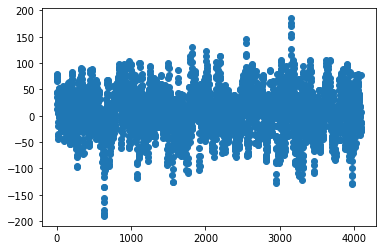

In [97]:
x_range = np.asarray([x for x in range(0,len(control_open[0]))])


plt.scatter(x_range,control_open[0])

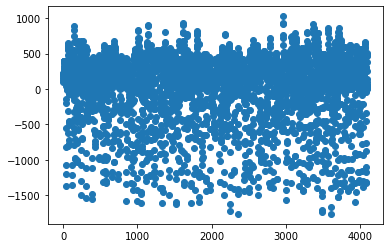

In [98]:
x_range = np.asarray([x for x in range(0,len(condition[0]))])


plt.scatter(x_range,condition[0])

## Histogram of Control and Condition Averages

In [99]:
control_open_mean = [np.mean(x) for x in control_open]
control_closed_mean = [np.mean(x) for x in control_closed]
condition_mean = [np.mean(x) for x in condition]



(array([ 7., 15.,  0.,  5., 13., 29., 25.,  0.,  0.,  6.]),
 array([-76.29411765, -62.98525751, -49.67639736, -36.36753722,
        -23.05867708,  -9.74981694,   3.5590432 ,  16.86790334,
         30.17676349,  43.48562363,  56.79448377]),
 <a list of 10 Patch objects>)

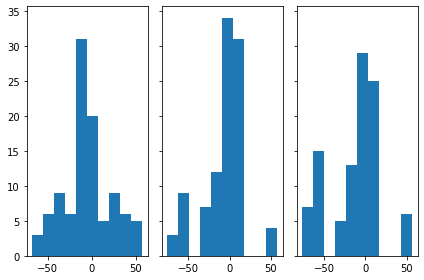

In [100]:
fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg

axs[0].hist(condition_mean, bins=10)
axs[1].hist(control_open_mean, bins=10)
axs[2].hist(control_closed_mean, bins=10)

## Extract Features

### Extracting the following features from selected data

<ol>
<li>Mean Activity Level</li>
<li>Standard Deviation</li>
<li> Trimmed Mean </li>
</ol>

In [101]:
training_data_raw = condition + control_hippo + control_epi + control_open + control_closed

len(training_data_raw)

500

In [102]:
def normalise(X):
    return [(x - min(X))/(max(X)-min(X)) for x in X]

In [ ]:
from scipy.stats import trim_mean
    
df_features = pd.DataFrame()
df_features['normalised_training_mean'] = normalise([np.mean(x) for x in training_data_raw])
df_features['normalised_training_std'] = normalise([np.std(x) for x in training_data_raw])


#df_features['normalised_training_entropy'] = normalise([perm_entropy(x,10) for x in training_data_raw])
df_features['normalised_training_sample_entropy'] = normalise([sample_entropy(x,2) for x in training_data_raw])
#df_features['normalised_training_app_entropy'] = normalise([app_entropy(x,2) for x in training_data_raw])
#df_features['normalised_training_svd_entropy'] = normalise([svd_entropy(x,3) for x in training_data_raw])
#df_features['normalised_training_spectral_entropy'] = normalise([spectral_entropy(x,100) for x in training_data_raw])






df_features['normalised_training_trimmed_mean'] = normalise([trim_mean(x,0.05) for x in training_data_raw])

In [137]:
X = df_features.values
y = np.asarray([1 for x in range(0,100)] + [0 for x in range(0,100)] + [2 for x in range(0,100)] + [3 for x in range(0,100)] + [4 for x in range(0,100)])

X.shape

(500, 4)

## SVM Classifier

In [138]:
clf = svm.SVC(kernel='linear', C=1)

scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
print(scores)
print("accuracy score weighted: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.44 0.36 0.58 0.5  0.58 0.44 0.56 0.44 0.46 0.48]
accuracy score weighted: 0.48 (+/- 0.14)


## Naive Bayes

In [126]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()

scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
print(scores)
print("accuracy score weighted: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.72 0.56 0.74 0.56 0.66 0.56 0.78 0.64 0.6  0.66]
accuracy score weighted: 0.65 (+/- 0.15)
